# Exercise 4 Solution


Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [13]:
NAME = "Frank Cichos"
COLLABORATORS = ""

---

This exercise is about classes and animations. You will also need some skills from the other lectures.
The task is to create a simulation of the COVID-19 spreading. Take your time to solve the problem. We will discuss that in more detail later.

In [3]:
import numpy as np
import matplotlib.pylab as plt
from time import sleep,time
from threading import Thread

from ipycanvas import MultiCanvas, hold_canvas,Canvas
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 20,
                     'axes.labelsize': 18,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 4,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 

## Creating a Person Class

The first task is to create a class like out colloid class from the lecture. Name the class `Person`.

The Class shall have the following properties:

* Person radius, self.R, initialized via the argument `R`
* Person position, self.p, this should be an np.array() with two entries x,y, initialized via the argument `p`
* Person velocity, self.v, this should be an np.array() with two entries v_x,v_y. The direction should be random, the magnitude initialized by the argument `v`
* World rectangle, self.box, the simulation box specified by an array of 4 numbers specifying the topleft corner (box[0],box[1]) and the bottom right corner (box[2],box[3]), initialzed by the argument `box`.
* State of health (boolean), self.sick, initialized by the argument `sick`

The constructor definition line should therefore look like this

~~~
def __init__(self, R , p , v, box,sick): 
~~~

The class shall only provide one method, which is called `update` and takes the timestep `dt` and a list of particles `p` as and argument. The method definition header should look like:

~~~
def update(self,dt,p): 
~~~



In [4]:
class Person:
    def __init__(self, R, p, v, sbox, sick):        
        # add initialisation code here
        self.R=R
        self.p=p
        v_x,v_y=np.random.rand()-0.5,np.random.rand()-0.5
        f=np.sqrt(v_x**2+v_y**2)
        self.v=[v*v_x/f,v*v_y/f]
        self.sbox=sbox
        self.infected=sick
        self.recovered=False
        self.step=0
        
    def update(self,dt,p):
        
        for particle in p:
            d=np.sum((self.p-particle.p)**2)
           
            if d<=(self.R+particle.R)**2 and d>0 and particle.infected==True and not self.recovered:
                self.infected=True
                
        if self.infected:
            self.step=self.step+1
        if self.step==100:
            self.infected=False
            self.recovered=True
                
        #print(self.v)
        new_x=self.p[0]+self.v[0]*dt
        new_y=self.p[1]+self.v[1]*dt
        
        if new_x>self.sbox[2]:
            new_x=self.sbox[2]-(new_x-self.sbox[2])
            self.v[0]=-self.v[0]

        if new_x<self.sbox[0]:
            new_x=self.sbox[0]-(new_x-self.sbox[0])
            self.v[0]=-self.v[0]
            
        if new_y>self.sbox[3]:
            new_y=self.sbox[3]-(new_y-self.sbox[3])
            self.v[1]=-self.v[1]
            
        if new_y<self.sbox[1]:
            new_y=self.sbox[1]-(new_y-self.sbox[1])
            self.v[1]=-self.v[1]
        
        self.p[0]=new_x
        self.p[1]=new_y
        
        return()
        
        
    

## List of particles

Test your class and create a list of 50 or 100 particles where you initialize your particle as follows:

* The x and y coordinates shall be able to take values between 10 and 390.
* Set an initial velocity of 4. 
* Set the box size to [0,0,400,400]
* Let all persons be healthy, just set 1 person to be sick, e.g. the first
* Store the persons in the list p



In [22]:
p=[]
for _ in range (100):
    position=np.array([np.random.randint(10,390),np.random.randint(10,390)])
    box=[0,0,400,400]
    p.append(Person(2,position,10.0,box,False))
p[0].infected=True

## Simulation Canvas

Create and display a simulation canvas of a width and height of 400 pixels.

In [23]:
canvas = Canvas(width=400, height=400)
display(canvas)

Canvas(height=400, width=400)

## Run the Simulation

Run the simulation with a timestep of dt=1 for 1000 steps. Update the position of each person in a loop and check in the same loop the total number of sick persons. Store the number of sick persons for each timestep in a list `sick`.

Draw current state of each step in an animation loop as we did that for the Brownian particles. If a person is sick, draw it in red. If the person is healthy, draw that in blue.

In [24]:
infected=[]
recovered=[]

for _ in range(1000):
    inf=0
    rec=0
    for particle in p:
        particle.update(1,p)
        if particle.infected:
            inf=inf+1
            #print(inf)
        if particle.recovered:
            rec=rec+1
            
    infected.append(inf)
    recovered.append(rec)  

    with hold_canvas(canvas):
        canvas.clear() # clear the canvas before drawing
        canvas.global_alpha = 0.5 # make the slightly transparent
            
        for particle in p: 
            
            if particle.infected:
                canvas.fill_style = 'red' 
            elif particle.recovered:
                canvas.fill_style = 'green' 
            else:
                canvas.fill_style = 'blue'
                
            canvas.fill_arc(particle.p[0],particle.p[1],particle.R, 0, 2*np.pi)


                # draw a filled circle for each particle
                
    sleep(0.01) 

## Analysis

Plot the number of sick persons over the timestep. Don't forget the proper axes.

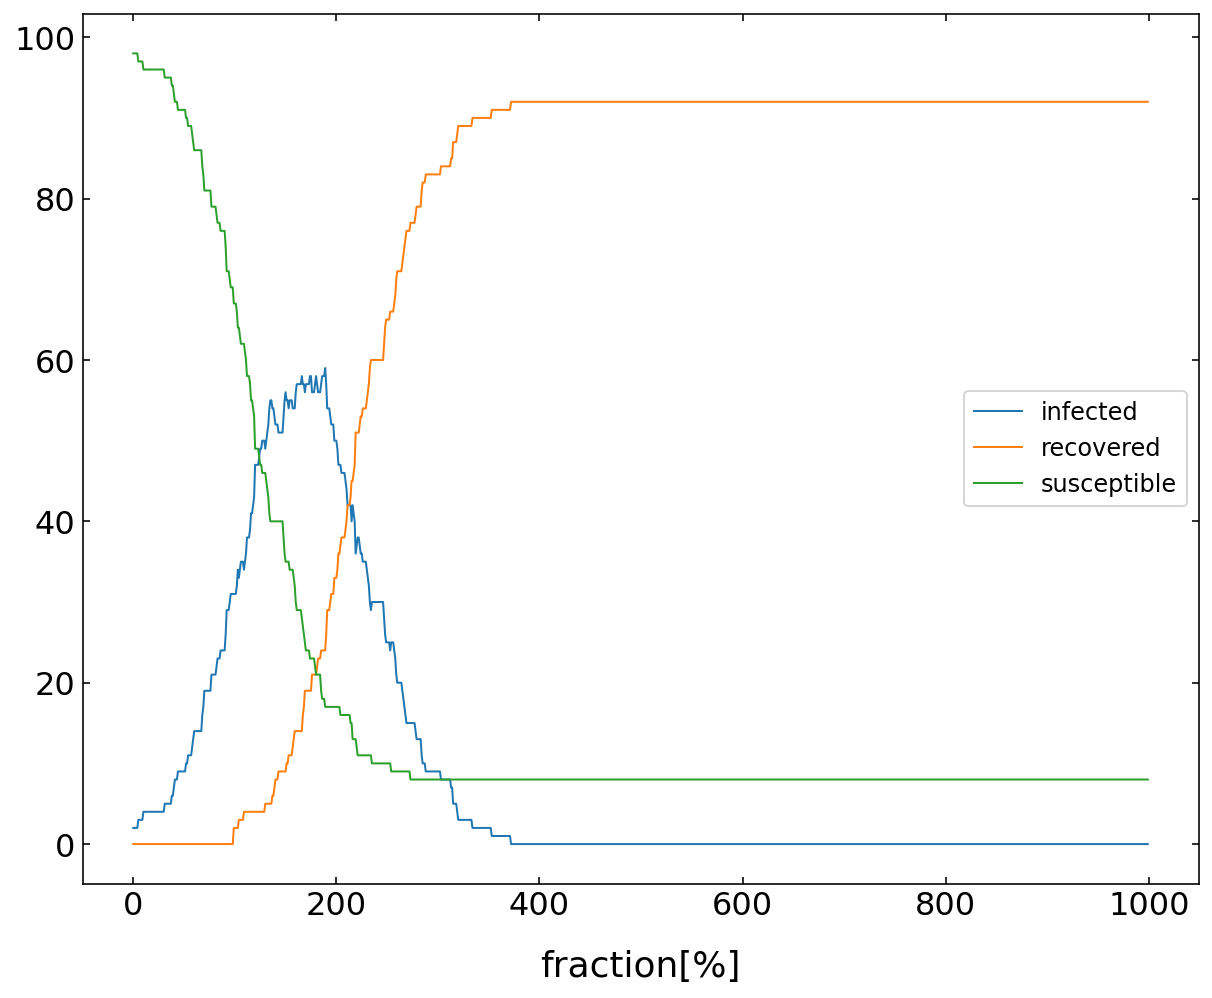

In [25]:
plt.figure(figsize=(10,8))
plt.plot(range(1000),np.array(infected), label='infected')
plt.plot(range(1000),np.array(recovered), label='recovered')
plt.plot(range(1000),100-np.array(recovered)-np.array(infected), label='susceptible')
plt.xlabel('time')
plt.xlabel('fraction[%]')
plt.legend()
plt.savefig("figure.pdf")
plt.show()

## Recovery

Implement that each person who has been infected recover after 100 timesteps of beeing sick. After they have become healthy, they do not become sick again. Do that implementation in the class. Run the simulation again and plot thge number of sick people again. 

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## For the Experts

For those of you who know a bit of Python already and get easily bored, here is an extra task, which is not graded.


Try to implement an additional class, called `Point`, which stores a 2d vector in the properties `self.x`,`self.y`
. Note that if you create such a class, you have to implement also the normal operations. 


| operation | function name |
| :---: | :---: |
| addition | `__add__` |
| subtraction | `__sub__` |
| multiplication | `__mul__` |
| division | `__truediv__` |


Here is an example of how to do that when multiplying the vector with a simple number.

~~~
    def __mul__(self,_f):
        return(Point(self.x*_f,self.y*_f))
~~~


In [15]:
class Point:
    def __init__(self,x,y):
        self.x=x
        self.y=y
        
    def __mul__(self,_f):
        return(Point(self.x*_f,self.y*_f))    

    def __truediv__(self,_f):
        return(Point(self.x / _f,self.y / _f))        
    
    def __sub__(self,_f):
        return(Point(self.x-_f,self.y-_f))    

    def __add__(self,_f):
        return(Point(self.x+_f,self.y+_f))    

    def __repr__(self):
        return("x:"+str(self.x)+", y:" +str(self.y))

In [16]:
point=Point(2,3)

In [17]:
point*2

x:4, y:6